In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, adjusted_rand_score, cluster
from numpy.linalg import svd

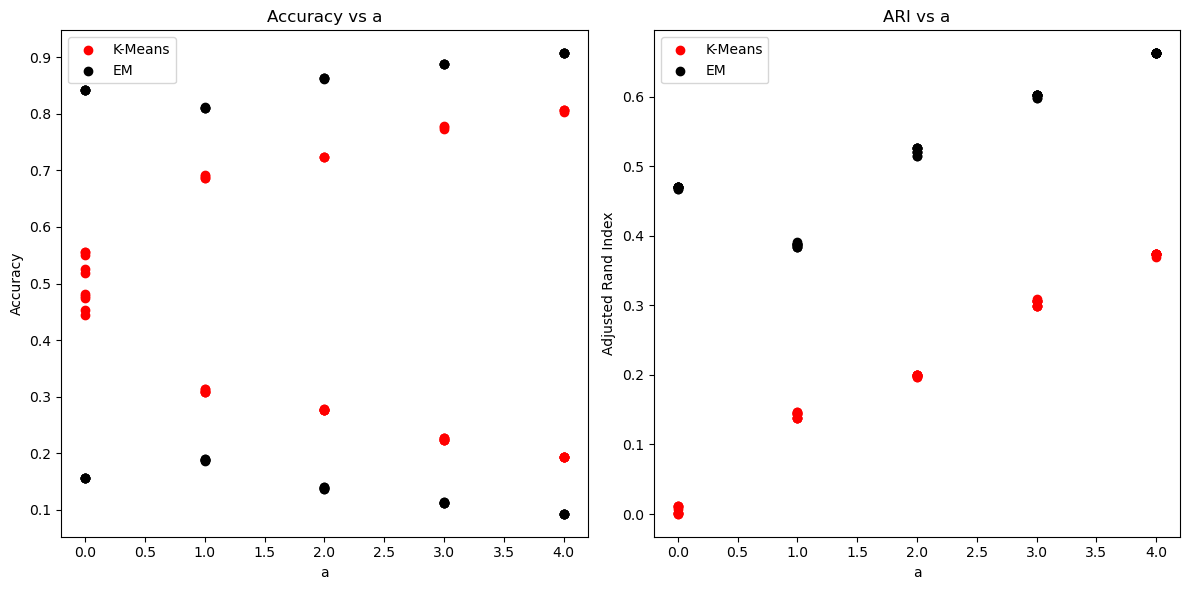

In [19]:
def generate_data(a, sigma=3, n=500):
    Xa = np.random.normal(loc=[a, 0], scale=1, size=(n, 2))
    Xq = np.random.normal(loc=[0, 0], scale=sigma, size=(n, 2))
    X = np.vstack((Xa, Xq))
    y = np.array([1] * n + [0] * n)
    return X, y

def cluster_and_evaluate(X, y, n_clusters=2, n_runs=10):
    accuracies_kmeans = []
    accuracies_em = []
    ari_kmeans = []
    ari_em = []

    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, n_init=1).fit(X)
        em = GaussianMixture(n_components=n_clusters, n_init=1).fit(X)

        labels_kmeans = kmeans.labels_
        labels_em = em.predict(X)

        accuracies_kmeans.append(accuracy_score(y, labels_kmeans))
        accuracies_em.append(accuracy_score(y, labels_em))

        ari_kmeans.append(adjusted_rand_score(y, labels_kmeans))
        ari_em.append(adjusted_rand_score(y, labels_em))

    return accuracies_kmeans, accuracies_em, ari_kmeans, ari_em

def plot_results(a_values, accuracies_kmeans, accuracies_em, ari_kmeans, ari_em):
    plt.figure(figsize=(12, 6))

    # Repeat each value of a 10 times to match the number of runs
    a_values_repeated = np.repeat(a_values, 10)

    plt.subplot(1, 2, 1)
    plt.scatter(a_values_repeated, accuracies_kmeans, color='red', label='K-Means')
    plt.scatter(a_values_repeated, accuracies_em, color='black', label='EM')
    plt.xlabel('a')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs a')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(a_values_repeated, ari_kmeans, color='red', label='K-Means')
    plt.scatter(a_values_repeated, ari_em, color='black', label='EM')
    plt.xlabel('a')
    plt.ylabel('Adjusted Rand Index')
    plt.title('ARI vs a')
    plt.legend()

    plt.tight_layout()
    plt.show()


a_values = [0, 1, 2, 3, 4]
accuracies_kmeans = []
accuracies_em = []
ari_kmeans = []
ari_em = []

for a in a_values:
    X, y = generate_data(a)
    acc_kmeans, acc_em, ari_k, ari_e = cluster_and_evaluate(X, y)
    accuracies_kmeans.append(acc_kmeans)
    accuracies_em.append(acc_em)
    ari_kmeans.append(ari_k)
    ari_em.append(ari_e)

plot_results(a_values, accuracies_kmeans, accuracies_em, ari_kmeans, ari_em)


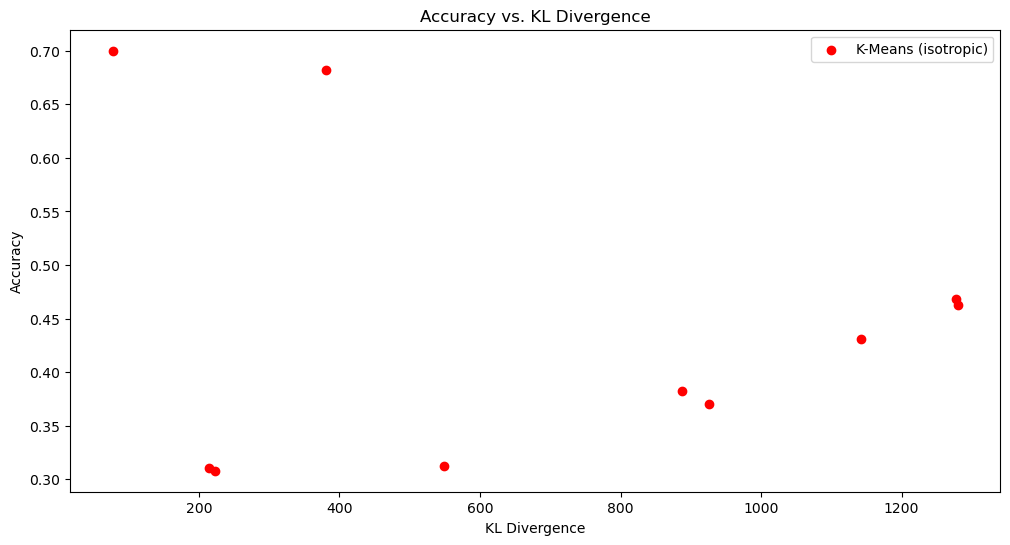

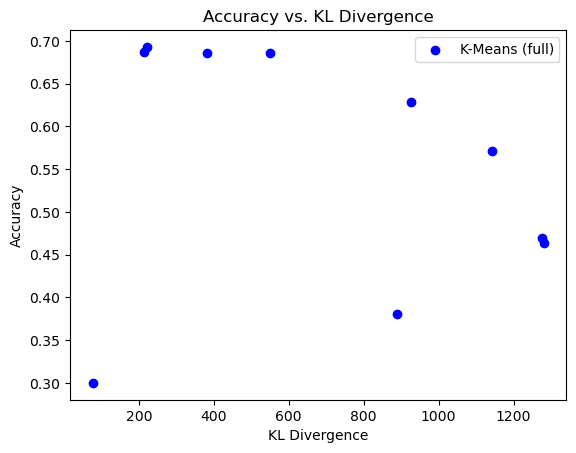

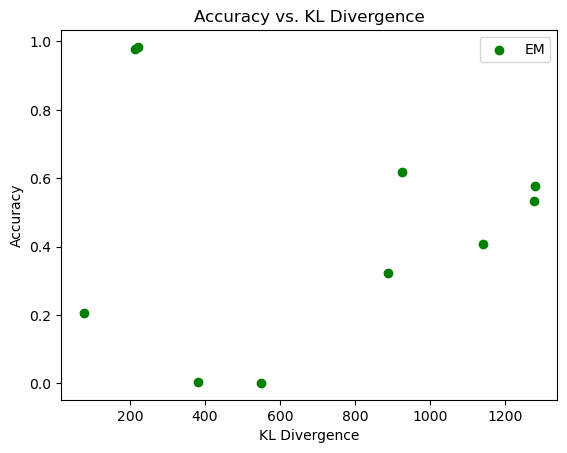

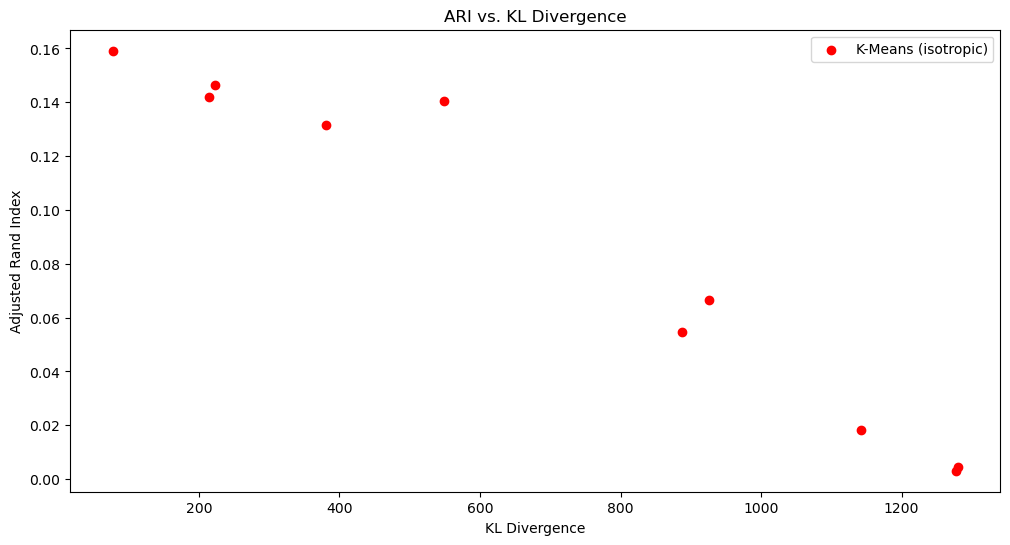

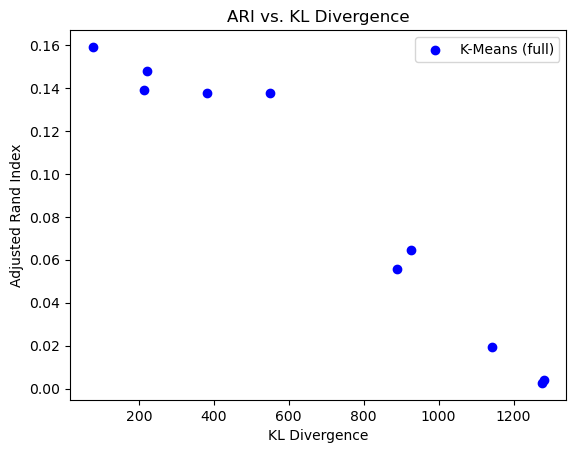

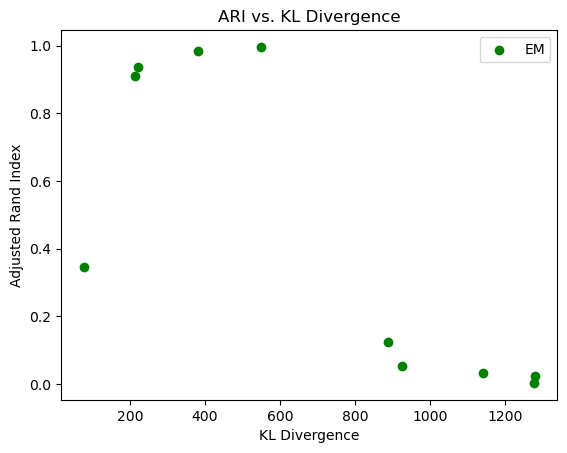

Results Table:
Run	KMeans (iso)	KMeans (full)	EM		ARI (iso)	ARI (full)	ARI (EM)	KL Div
1	0.431		0.571		0.408		0.018		0.019		0.033		1141.960
2	0.382		0.381		0.322		0.055		0.056		0.126		887.635
3	0.682		0.686		0.004		0.132		0.138		0.984		381.443
4	0.311		0.687		0.977		0.142		0.139		0.910		214.230
5	0.308		0.693		0.984		0.147		0.148		0.937		222.353
6	0.370		0.628		0.617		0.067		0.065		0.054		925.708
7	0.700		0.300		0.206		0.159		0.159		0.345		77.060
8	0.312		0.686		0.001		0.141		0.138		0.996		549.255
9	0.463		0.464		0.577		0.004		0.004		0.023		1280.315
10	0.468		0.470		0.534		0.003		0.003		0.004		1276.838


In [33]:
def generate_random_rotation_matrix():
    M = np.random.normal(0, 1, (2, 2))
    U, _, _ = svd(M)
    return U

def compute_kl_divergence(cov1, cov2):
    inv_cov2 = np.linalg.inv(cov2)
    return 0.5 * (np.log(np.linalg.det(cov2) / np.linalg.det(cov1))
                  - len(cov1) + np.trace(inv_cov2 @ cov1)
                  + (np.mean(cov2, axis=0) - np.mean(cov1, axis=0)).T @ inv_cov2 @ (np.mean(cov2, axis=0) - np.mean(cov1, axis=0)))

def generate_dataset(U):
    cov = U @ np.diag([100, 1]) @ U.T
    Xq = np.random.multivariate_normal([0, 0], cov, 500)
    Xp = np.random.multivariate_normal([10, 0], cov, 500)
    X = np.vstack((Xq, Xp))
    y = np.array([0] * 500 + [1] * 500)
    return X, y, cov

def run_clustering(X, y):
    kmeans_iso = KMeans(n_clusters=2, n_init=10).fit(X)
    em_iso = GaussianMixture(n_components=2, covariance_type='spherical').fit(X)
    em_full = GaussianMixture(n_components=2, covariance_type='full').fit(X)

    acc_kmeans_iso = accuracy_score(y, kmeans_iso.labels_)
    acc_em_iso = accuracy_score(y, em_iso.predict(X))
    acc_em_full = accuracy_score(y, em_full.predict(X))

    ari_kmeans_iso = adjusted_rand_score(y, kmeans_iso.labels_)
    ari_em_iso = adjusted_rand_score(y, em_iso.predict(X))
    ari_em_full = adjusted_rand_score(y, em_full.predict(X))

    return acc_kmeans_iso, acc_em_iso, acc_em_full, ari_kmeans_iso, ari_em_iso, ari_em_full


n_runs = 10
results = []

for _ in range(n_runs):
    U = generate_random_rotation_matrix()
    X, y, cov = generate_dataset(U)
    acc_kmeans_iso, acc_kmeans_full, acc_em, ari_kmeans_iso, ari_kmeans_full, ari_em = run_clustering(X, y)
    kl_divergence = compute_kl_divergence(np.diag([100, 1]), cov)
    results.append([acc_kmeans_iso, acc_kmeans_full, acc_em, ari_kmeans_iso, ari_kmeans_full, ari_em, kl_divergence])

# Convert results to a numpy array for easier slicing
results = np.array(results)

# Plotting accuracy vs. KL divergence
plt.figure(figsize=(12, 6))
plt.scatter(results[:, 6], results[:, 0], color='red', label='K-Means (isotropic)')
plt.xlabel('KL Divergence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. KL Divergence')
plt.legend()
plt.show()
plt.close()
plt.scatter(results[:, 6], results[:, 1], color='blue', label='K-Means (full)')
plt.xlabel('KL Divergence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. KL Divergence')
plt.legend()
plt.show()
plt.close()
plt.scatter(results[:, 6], results[:, 2], color='green', label='EM')
plt.xlabel('KL Divergence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. KL Divergence')
plt.legend()
plt.show()
plt.close()


# Plotting ARI vs. KL divergence
plt.figure(figsize=(12, 6))
plt.scatter(results[:, 6], results[:, 3], color='red', label='K-Means (isotropic)')
plt.xlabel('KL Divergence')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs. KL Divergence')
plt.legend()
plt.show()
plt.close()
plt.scatter(results[:, 6], results[:, 4], color='blue', label='K-Means (full)')
plt.xlabel('KL Divergence')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs. KL Divergence')
plt.legend()
plt.show()
plt.close()
plt.scatter(results[:, 6], results[:, 5], color='green', label='EM')
plt.xlabel('KL Divergence')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs. KL Divergence')
plt.legend()
plt.show()
plt.close()


# Printing the results table
print("Results Table:")
print("Run\tKMeans (iso)\tKMeans (full)\tEM\t\tARI (iso)\tARI (full)\tARI (EM)\tKL Div")
for i, result in enumerate(results):
    print(f"{i + 1}\t{result[0]:.3f}\t\t{result[1]:.3f}\t\t{result[2]:.3f}\t\t{result[3]:.3f}\t\t{result[4]:.3f}\t\t{result[5]:.3f}\t\t{result[6]:.3f}")
